In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [39]:
# cv2 dnn.readNet("./yolo3-tiny.weights","./yolov3-tiny.cfg")

In [40]:
modelConf="yolov3-tiny.cfg"
modelWeights="yolov3-tiny.weights"
net = cv2.dnn.readNetFromDarknet(modelConf,modelWeights)
net

< cv2.dnn.Net 0000016A0EDC5B30>

In [41]:
classesFile="coco.names"
with open(classesFile,'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
classes        
    

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [42]:
len(classes)

80

In [43]:
l=net.getLayerNames() # number of layers
len(l)

48

In [44]:
#l

In [45]:
l1=net.getUnconnectedOutLayers()   # yolo layers index
l1

array([36, 48])

In [46]:
l[35],l[47]

('yolo_16', 'yolo_23')

In [47]:
l2=net.getUnconnectedOutLayersNames() # yolo layers names
l2

('yolo_16', 'yolo_23')

## blobfromimage() functiontion

#### it returns a 4-dimensional array/blob for the input image. You can additionally use it to prprocess your image
#### it's different parameters to transform your image,

#### so let's discuss all its parameters

In [48]:
frame=cv2.imread('C:\\Users\\sony\\ DATA SCIENCE  NARESH IT\\dog.jpg')
frame.shape

(3209, 4896, 3)

In [50]:
# reshape the image
inpWidth = 416
inpHeight = 416
frame = cv2.imread('C:\\Users\\sony\\ DATA SCIENCE  NARESH IT\\dog.jpg')
# generally image will take as BGR we need to change RGB
blob = cv2.dnn.blobFromImage(frame, 1/255, 
                             (inpWidth, inpHeight), 
                             [0,0,0], 
                             1, 
                             crop = False) # pass the image

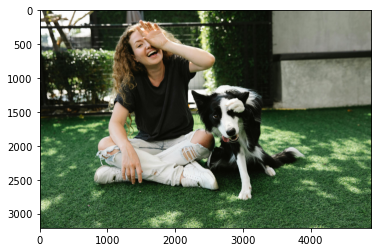

In [51]:
# Change BGR to RGB
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

In [52]:
frame.shape

(3209, 4896, 3)

In [53]:
blob.shape  # blob will take in revrse

(1, 3, 416, 416)

In [54]:
blob[0].shape

(3, 416, 416)

In [55]:
#im=blob[0].reshape(416,416,3)
#plt.imshow(im)

In [56]:
net.setInput(blob)

# for the yolo arch ,we can't pass direct image
# we are converting image into blob

In [57]:
yolo_layers=net.getUnconnectedOutLayersNames()
outs = net.forward(yolo_layers)
outs

# there two yolo layers are there 
# in image two objects are there
# we have total 80 classes are there 
# we got 85 value 5+80
# 5 means x,y,w,h,confidance
# 80 means probability of each class

(array([[0.066596  , 0.05353387, 0.15272969, ..., 0.        , 0.        ,
         0.        ],
        [0.04437212, 0.04412637, 0.2065676 , ..., 0.        , 0.        ,
         0.        ],
        [0.03679468, 0.04435827, 0.90055937, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95115495, 0.9594276 , 0.20559184, ..., 0.        , 0.        ,
         0.        ],
        [0.9630398 , 0.95657384, 0.25148907, ..., 0.        , 0.        ,
         0.        ],
        [0.96737695, 0.95766395, 0.86767966, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02558093, 0.02642762, 0.02381558, ..., 0.        , 0.        ,
         0.        ],
        [0.02781741, 0.02623408, 0.04282051, ..., 0.        , 0.        ,
         0.        ],
        [0.01617791, 0.02453649, 0.10108549, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.98187727, 0.9804216 , 0.02431019, ..., 0.        , 0.        ,
         0.        

In [58]:
len(outs) # two objects output

2

In [59]:
len(outs[0]) # model is identifies total 507 boxes and predictins

#5+80
# first 5 values are the x,y,w,h, and confidance
# remaining 80 are the classes



507

In [60]:
len(outs[1]) # 2028 bounding boxes 

2028

In [61]:
list(outs[0][0])[:5]

[0.066596, 0.053533867, 0.15272969, 0.14839092, 0.00042675162]

In [62]:
list(outs[0][0])[5:]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [63]:
outs[0][5]

array([1.1503814e-01, 4.8875306e-02, 7.9438376e-01, 5.7711989e-01,
       2.3999829e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

## Detect the Boundomg Boxes

- Those are what are called normalized coordinates.
- To get the width in pixels you would need to multiply by the width of the images

In [64]:
frameHeight = frame.shape[0]
frameWidth = frame.shape[1]
boxes=[]
confidences=[]
classIDs=[]
for out in outs: # calling each object boxes
    for detection in out: # calling each object boxes
        score=detection[5:] # probability of 80 classes
        class_id=np.argmax(score) # max probability id
        confidence=score[class_id] # getting the confidance
        if confidence>0.07:       # if confidence >70% consider as that is valid bounding box
            print(detection)
            centerX = int(detection[0] * frameWidth) # before we pass the object we divided with frame width
            # these are the normalized value so multiply again
            centerY = int(detection[1] * frameHeight)
            width = int(detection[2] * frameWidth)
            height = int(detection[3] * frameHeight)
            left = int(centerX - width/2)
            top = int(centerY - height/2)
            
            classIDs.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left, top, width, height])
            
boxes            

[0.3624373  0.42617136 0.33502007 0.8573198  0.20760997 0.20577028
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.35633218 0.4257582  0.37413326 0.9944648  0.5020642  0.4983644
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

[[954, -8, 1640, 2751], [828, -229, 1831, 3191], [2148, 1056, 1405, 1683]]

In [65]:
len(outs[0]), len(outs[1])

(507, 2028)

In [66]:
507+2028

2535

In [67]:
confidences

[0.20577028393745422, 0.4983643889427185, 0.25872480869293213]

## NMS: Non Max suppresion

## IOU: Intersection of union

## jaccard distance

In [68]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
indexes # surpass many boxes

()

## Apply the Bounding Box

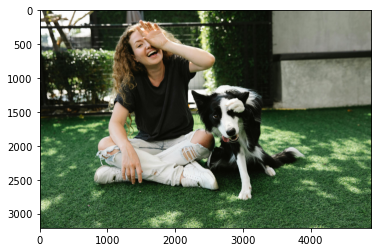

In [69]:
font=cv2.FONT_HERSHEY_SIMPLEX
color=(255,0,0) #RGB
for i in indexes:
    x,y,w,h=boxes[i]
    label=str(classes[classIDs[i]])
    confi=str(round(confidences[i],2))
    #color=colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,5,i) # (x,y): left,top (x+w,y+h): right,bottom
    cv2.putText(img,label +" "+confi,(x,y),font,2,(255,255,255),3)
plt.imshow(img)    

    
    

## Method-1:

#### Bounding box on images

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

[0.3624373  0.42617136 0.33502007 0.8573198  0.20760997 0.20577028
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.35633218 0.4257582  0.37413326 0.9944648  0.5020642  0.4983644
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

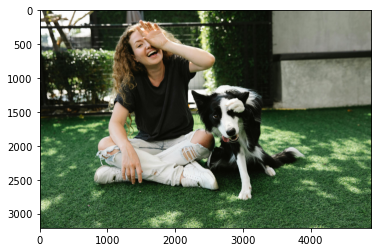

In [71]:
def post_process(frame,outs,img,classes):
    frameHeight = frame.shape[0]
frameWidth = frame.shape[1]
boxes=[]
confidences=[]
classIDs=[]
for out in outs: # calling each object boxes
    for detection in out: # calling each object boxes
        score=detection[5:] # probability of 80 classes
        class_id=np.argmax(score) # max probability id
        confidence=score[class_id] # getting the confidance
        if confidence>0.07:       # if confidence >70% consider as that is valid bounding box
            print(detection)
            centerX = int(detection[0] * frameWidth) # before we pass the object we divided with frame width
            # these are the normalized value so multiply again
            centerY = int(detection[1] * frameHeight)
            width = int(detection[2] * frameWidth)
            height = int(detection[3] * frameHeight)
            left = int(centerX - width/2)
            top = int(centerY - height/2)
            
            classIDs.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left, top, width, height])
            
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
font=cv2.FONT_HERSHEY_SIMPLEX
color=(255,0,0) #RGB
for i in indexes:
    x,y,w,h=boxes[i]
    label=str(classes[classIDs[i]])
    confi=str(round(confidences[i],2))
    #color=colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,5,i) # (x,y): left,top (x+w,y+h): right,bottom
    cv2.putText(img,label +" "+confi,(x,y),font,2,(255,255,255),3)
plt.imshow(img)    

    
               

In [80]:
# ALL at one place
modelConf="yolov3-tiny.cfg"
modelWeights="yolov3-tiny.weights"
classesFile="coco.names"
image=('C:\\Users\\sony\\ DATA SCIENCE  NARESH IT\\horse.jpg')
def yolo_out(modelConf,modelWeights,classesFile,image):
    net = cv2.dnn.readNetFromDarknet(modelConf,modelWeights)
    with open(classesFile,'rt') as f:
        classes = f.read().rstrip('\n').split('\n')
        
    inpWidth = 416
    inpHeight = 416
    
    frame = cv2.imread(image)
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 

    blob = cv2.dnn.blobFromImage(frame, 1/255, 
                             (inpWidth, inpHeight), 
                             [0,0,0], 1, 
                             crop = False)
    net.setInput(blob)
    yolo_layers=net.getUnconnectedOutLayersNames()
    outs = net.forward(yolo_layers)
    post_process(frame,outs,img,classes)
    
yolo_out(modelConf,modelWeights,classesFile,image)    
    
    
    
        
    
